In [29]:
# Task: use the linear regression to predict the Culmen Depth (mm).
import pandas as pd
import seaborn as sns
import statsmodels.api as sms
import matplotlib.pyplot as plt

In [2]:
penguins = pd.read_csv('data/all_penguins_clean.csv')
penguins.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Real ID,Sex
0,PAL0708,1,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,A_0,MALE
1,PAL0708,2,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,A_1,FEMALE
2,PAL0708,3,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,A_2,FEMALE
3,PAL0708,4,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,A_3,NaN
4,PAL0708,5,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,A_4,FEMALE


d:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

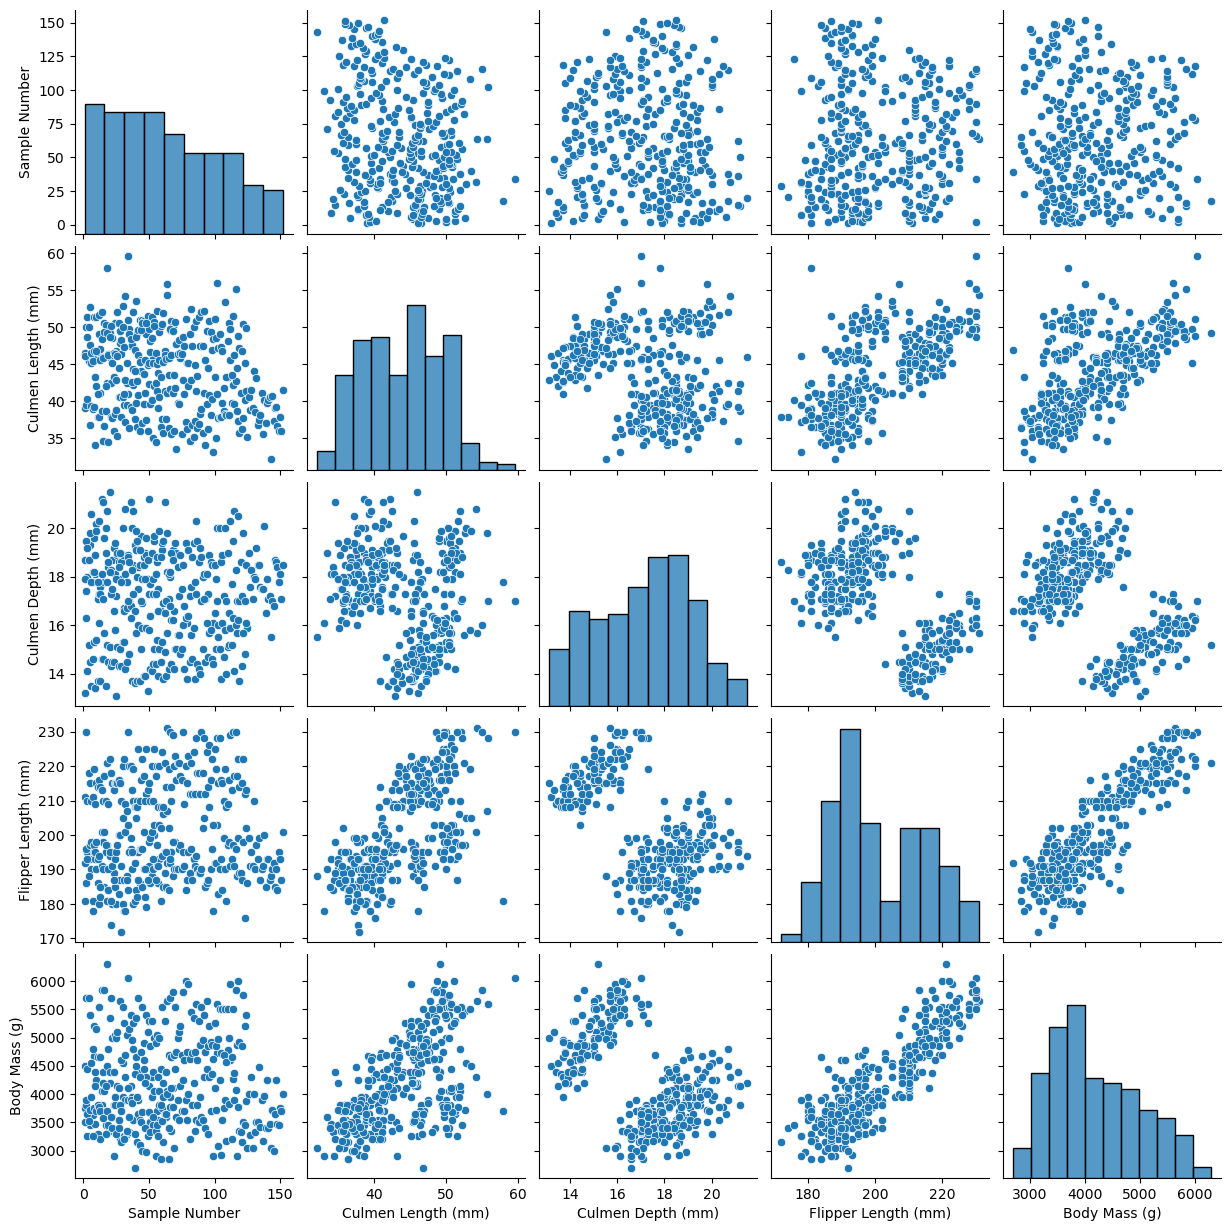

In [4]:
sns.pairplot(penguins)

In [22]:
penguins = penguins[~penguins['Culmen Depth (mm)'].isna()]

In [33]:
penguins.columns

Index(['studyName', 'Sample Number', 'Species', 'Region', 'Island', 'Stage',
       'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Real ID',
       'Sex'],
      dtype='object')

In [38]:
penguins.Species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [39]:
adelie = penguins.query('Species == "Adelie"')
chinstrap = penguins.query('Species == "Chinstrap"')
gentoo = penguins.query('Species == "Gentoo"')

d:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

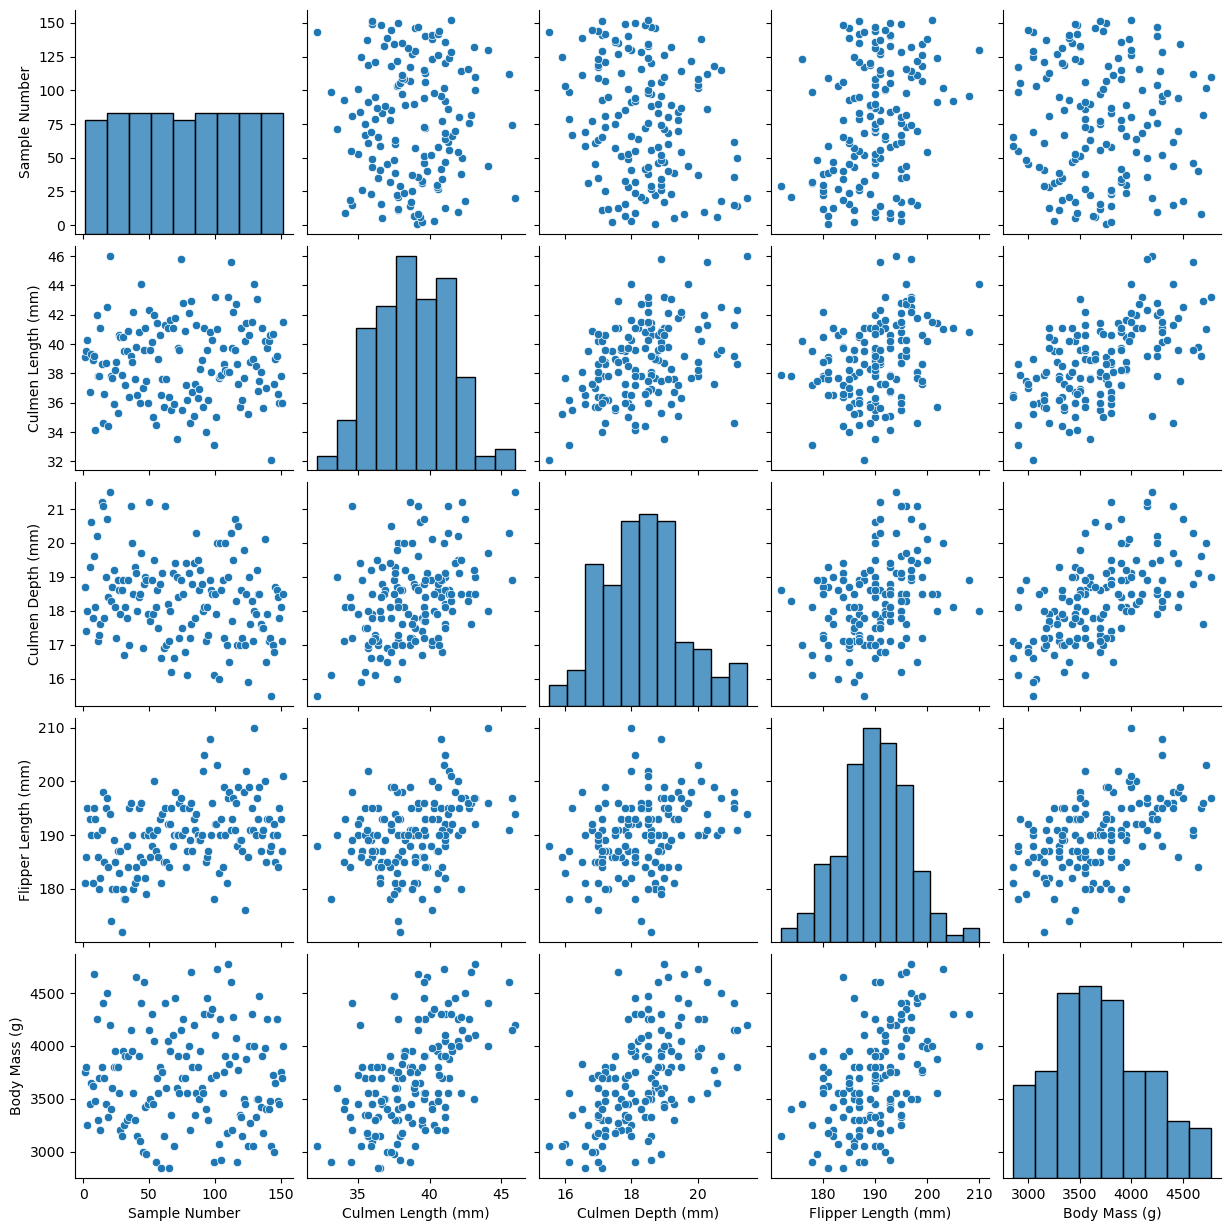

In [46]:
sns.pairplot(adelie)

In [45]:
y = adelie['Culmen Depth (mm)']
X = adelie[['Body Mass (g)', 'Flipper Length (mm)']]
X = sms.add_constant(X)
model = sms.OLS(y,X)
model_results = model.fit()
model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Culmen Depth (mm)   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     37.07
Date:                Tue, 02 Jul 2024   Prob (F-statistic):           8.87e-14
Time:                        18:58:38   Log-Likelihood:                -212.71
No. Observations:                 151   AIC:                             431.4
Df Residuals:                     148   BIC:                             440.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  11.1984      2.427      4.614      0.000       6.403      15.994
Body Mass (g)           0.0015      0.000      7.289      0.000       0.001       0.002
Flipper Length (mm)     0.0090      0.014      0.639      0.524      -0.019       0.037
==============================================================================
Omnibus:                        3.605   Durbin-Watson:                   1.750
Prob(Omnibus):                  0.165   Jarque-Bera (JB):                3.595
Skew:                           0.372   Prob(JB):                        0.166
Kurtosis:                       2.868   Cond. No.                     1.11e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
pearsoncorr = chinstrap.corr(method='pearson', numeric_only= True)

<Axes: >

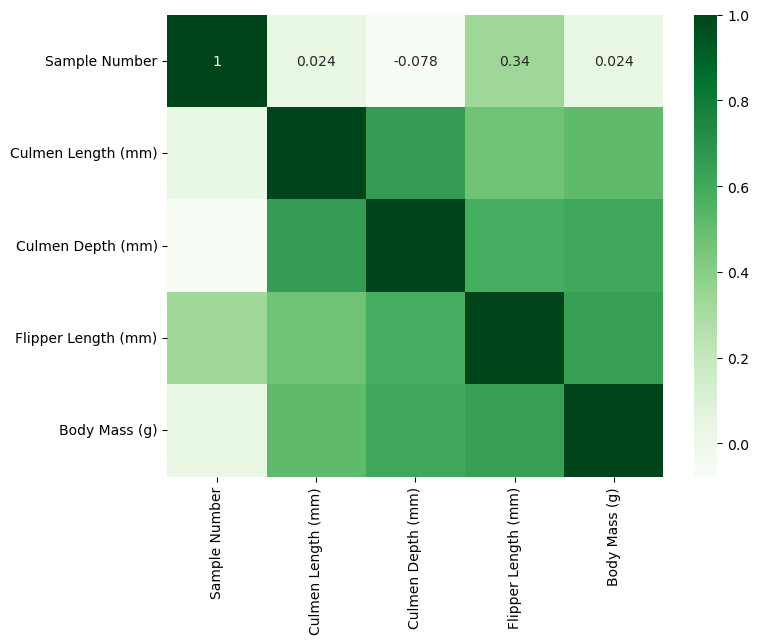

In [50]:
ax = plt.subplots(figsize=(8,6))
sns.heatmap(pearsoncorr,
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='Greens',
            annot=True)